Building a model that predicts the rating of a movie based on
features like genre, director, and actors.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [ ]:
#Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv', encoding='latin-1')

# Display the first few rows
print(df.head())
print(df.info())
print(df.describe())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

Data Cleaning and Preprocessing

In [ ]:
# Handle missing values
df = df.dropna()

# Convert categorical features to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Genre', 'Director', 'Actor 1','Actor 2','Actor 3'])

# Clean and convert 'Year' column to numeric
df['Year'] = df['Year'].str.extract('(\d+)').astype(float) # Extract numeric part and convert to float

# Clean and convert 'Duration' column to numeric
# Extract numeric part, handle non-numeric values, and convert to float
df['Duration'] = pd.to_numeric(df['Duration'].str.extract('(\d+)')[0], errors='coerce')
df['Duration'] = df['Duration'].fillna(df['Duration'].mean()) # Fill missing values with the mean

# Normalize numerical features if necessary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_feature_column = 'Year'  # Example: Assuming 'Year' is the numerical feature
df[numerical_feature_column] = scaler.fit_transform(df[[numerical_feature_column]])

In [ ]:
# Identify and handle non-numeric values in the DataFrame
for column in df.columns:
    if df[column].dtype == 'object':
        # Check if the column contains any non-numeric values
        non_numeric = df[column][pd.to_numeric(df[column], errors='coerce').isna()]
        if not non_numeric.empty:
            print(f"Non-numeric values found in column '{column}':")
            print(non_numeric)
            # Handle non-numeric values by replacing them with a placeholder (e.g., 0)
            df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0) # Replace non-numeric with 0

Non-numeric values found in column 'Name':
1        #Gadhvi (He thought he was Gandhi)
3                                   #Yaaram
5                      ...Aur Pyaar Ho Gaya
6                                 ...Yahaan
8                        ?: A Question Mark
                        ...                
15493                                Zubaan
15494                              Zubeidaa
15503                       Zulm Ki Zanjeer
15505                                 Zulmi
15508                          Zulm-O-Sitam
Name: Name, Length: 5652, dtype: object
Non-numeric values found in column 'Votes':
6         1,086
15        6,619
28        6,329
30        1,002
33        1,235
          ...  
15437     1,551
15440     1,301
15447     3,314
15476    70,344
15494     1,496
Name: Votes, Length: 1368, dtype: object


Exploratory Data Analysis (EDA)

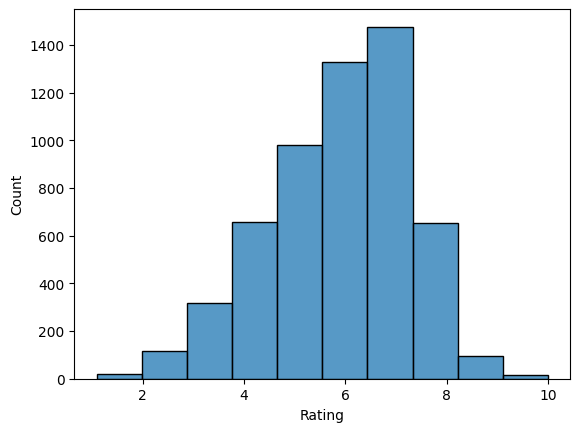

In [ ]:
# Distribution of ratings
sns.histplot(df['Rating'], bins=10)
plt.show()

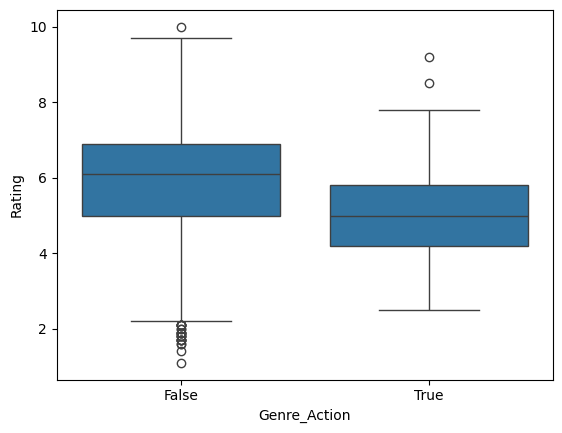

In [ ]:
# Relationship between features and ratings
sns.boxplot(x='Genre_Action', y='Rating', data=df)
plt.show()

 Feature Engineering

In [ ]:
# Example: Creating a new feature based on existing ones
df['feature_interaction'] = df['Year'] * df['Duration']

 Model Building

In [ ]:
# Split data into training and testing sets
X = df.drop('Rating', axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MAE: 0.8564302120141343
MSE: 1.3129603295053005
R-squared: 0.2909599920872151
